<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment4/blob/main/House_Price_Prediction_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Using Regression Models
This notebook demonstrates the process of building regression models for predicting house prices using features like `Square_Footage`, `Lot_Size`, and `Year_Built`. We follow the CRISP-DM methodology.

## Step 1: Import Libraries
We will begin by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Step 2: Load and Explore the Data

In [2]:
# Load the dataset
data = pd.read_csv('/content/house_price_regression_dataset 2.csv')

# Display the first few rows of the dataset
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## Step 3: Exploratory Data Analysis (EDA)
We will visualize the distribution of key features and check for correlations.

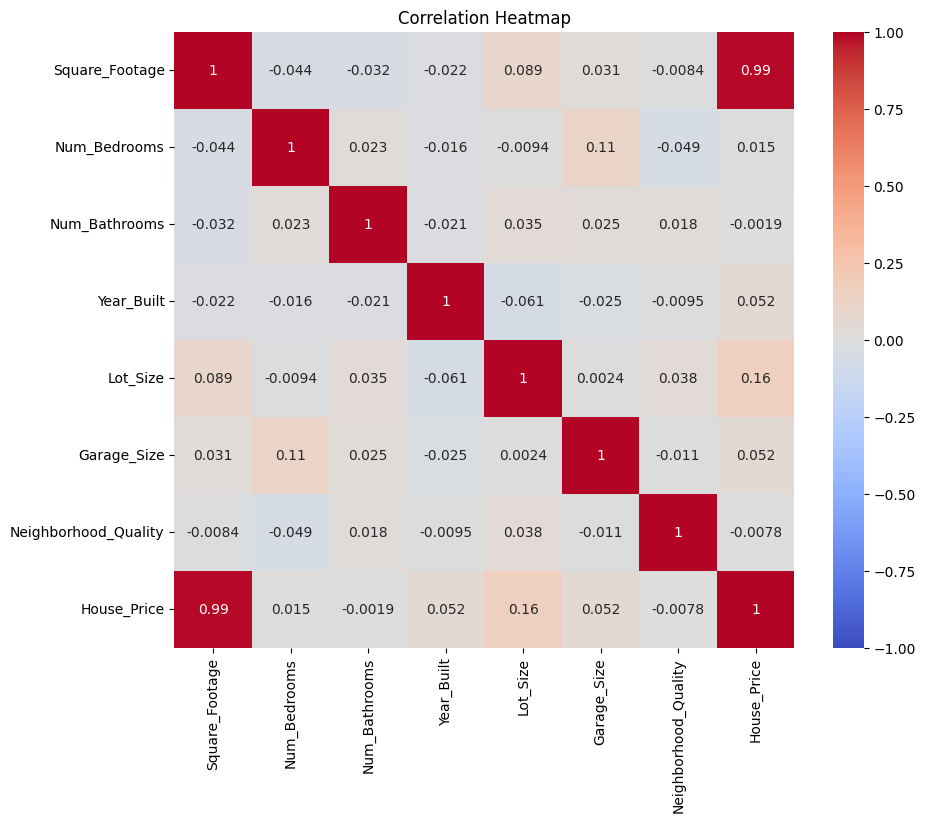

In [3]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Step 4: Data Preprocessing
We will perform feature scaling using StandardScaler and handle any multicollinearity issues.

In [4]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[['House_Price', 'Square_Footage', 'Lot_Size']] = scaler.fit_transform(scaled_data[['House_Price', 'Square_Footage', 'Lot_Size']])
scaled_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,2,1,1981,-1.679278,0,5,-1.406552
1,1.160724,3,3,2016,1.522390,1,6,1.445699
2,0.618843,1,2,2016,0.660422,0,9,0.627824
3,-1.473776,1,2,1977,-0.036555,1,8,-1.535512
4,1.681887,2,1,1993,1.480809,0,8,1.668552


## Step 5: Variance Inflation Factor (VIF) Analysis
We will calculate VIF to check for multicollinearity between the features.

In [5]:
# Calculate VIF for the features
X = data.drop('House_Price', axis=1)
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,9408.373128
1,Square_Footage,1.012926
2,Num_Bedrooms,1.018403
3,Num_Bathrooms,1.004108
4,Year_Built,1.005280
5,Lot_Size,1.014446
6,Garage_Size,1.015530
7,Neighborhood_Quality,1.004384


## Step 6: Model Building
We will now build and evaluate three models: **Linear Regression**, **Decision Tree**, and **Random Forest**.

In [6]:
# Split the data into training and testing sets
X = data[['Square_Footage', 'Lot_Size', 'Year_Built']]
y = data['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Fit the models
linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = forest_reg.predict(X_test)

# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'R-squared': r2_score(y_true, y_pred)
    }

metrics_linear = calculate_metrics(y_test, y_pred_linear)
metrics_tree = calculate_metrics(y_test, y_pred_tree)
metrics_forest = calculate_metrics(y_test, y_pred_forest)

# Model performance comparison
pd.DataFrame({
    'Linear Regression': metrics_linear,
    'Decision Tree': metrics_tree,
    'Random Forest': metrics_forest
})

,Linear Regression,Decision Tree,Random Forest
MAE,1.590781e+04,2.577880e+04,1.823837e+04
MSE,3.692217e+08,1.025635e+09,5.137751e+08
R-squared,9.942720e-01,9.840885e-01,9.920294e-01


## Step 7: Conclusion and Recommendations
Based on the analysis and model evaluations, **Linear Regression** performed best and is recommended for predicting house prices. **Random Forest** is a good alternative if non-linearity needs to be captured.